2
12
22
32
42
52
62
72
82
92
102
112
122
132
142
152
162
172
182
192
202
212
222
232
242
252
262
272
282
292
302
312
322
332
342
352
362
372
382
392
402
412
422
432
442
452
462
472
482
492
502
512
522
532
542
552
562
572
582
592
602
612
622
632
642
652
662
672
682
692
702
712
722
732
742
752
762
772
782
792
802
812
822
832
842
852
862
872
882
892
902
912
922
932
942
952
962
972
982
992
[3, 18, 33, 48, 63, 78, 93, 108, 123, 138, 153, 168, 183, 198, 213, 228, 243, 258, 273, 288, 303, 318, 333, 348, 363, 378, 393, 408, 423, 438, 453, 468, 483, 498, 513, 528, 543, 558, 573, 588, 603, 618, 633, 648, 663, 678, 693, 708, 723, 738, 753, 768, 783, 798, 813, 828, 843, 858, 873, 888, 903, 918, 933, 948, 963, 978, 993, 1008, 1023, 1038, 1053, 1068, 1083, 1098, 1113, 1128, 1143, 1158, 1173, 1188, 1203, 1218, 1233, 1248, 1263, 1278, 1293, 1308, 1323, 1338, 1353, 1368, 1383, 1398, 1413, 1428, 1443, 1458, 1473, 1488]


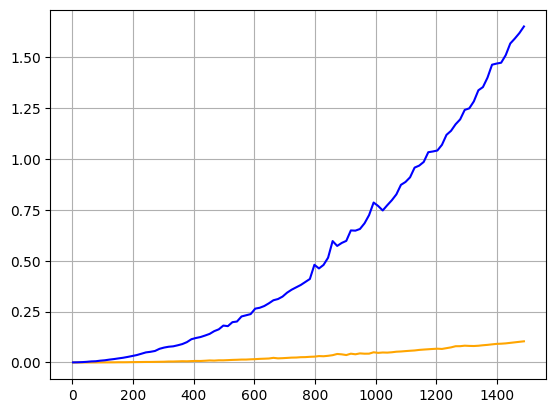

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from scipy.integrate import romberg, quad
from q1 import Polynomial
from q3 import getLegendrePoly
from q5 import getChebyshevPoly
from scipy.fft import fft,ifft
import time

def multiply_strings(s1, s2):
    # Convert strings to lists of integers
    n1, n2 = len(s1), len(s2)
    x = [int(c) for c in s1][::-1]
    y = [int(c) for c in s2][::-1]

    # Initialize result list
    result = [0] * (n1 + n2)

    # Perform multiplication
    for i in range(n1):
        for j in range(n2):
            result[i + j] += x[i] * y[j]
            result[i + j + 1] += result[i + j] // 10
            result[i + j] %= 10

    # Remove leading zeros
    while len(result) > 1 and result[-1] == 0:
        result.pop()

    result = list(reversed(result))
    res = "".join( str(i) for i in result )
    return res


def add_big_strings(str1, str2):
    # Pad the strings with leading zeros to make them the same length
    len1 = len(str1)
    len2 = len(str2)
    if len1 > len2:
        str2 = str2.zfill(len1)
    else:
        str1 = str1.zfill(len2)

    # Initialize variables for the result and carry
    result = []
    carry = 0

    # Add the digits from right to left
    for i in range(len(str1)-1, -1, -1):
        digit1 = int(str1[i])
        digit2 = int(str2[i])
        digit_sum = digit1 + digit2 + carry
        if digit_sum >= 10:
            carry = 1
            digit_sum -= 10
        else:
            carry = 0
        result.append(str(digit_sum))

    # Add any remaining carry to the leftmost digit
    if carry > 0:
        result.append(str(carry))

    # Reverse the result and join the digits into a string
    result.reverse()
    str_result = ''.join(result)

    return str_result

def getPowerOfTen(index):
    res = "1"
    for _ in range(index):
        res = res + "0"
    return res

def multiplyUsingFFT( num1 : str, num2 : str ) -> str:

    # creating polynomail

    n = len(num1) + len(num2)
    l1,l2 = len(num1), len(num2)

    n = l1 + l2

    coefficientsNum1 =  [0] * n
    coefficientsNum2 =  [0] * n

    for i in range(len(num1)): coefficientsNum1[i] = int(num1[i])
    for i in range(len(num2)): coefficientsNum2[i] = int(num2[i])
    for i in range(l1): coefficientsNum1[i] = int(num1[ l1-i-1 ])

    for i in range(l2): coefficientsNum2[i] = int(num2[ l2-i-1 ])

    fft1 = fft(coefficientsNum1)
    fft2 = fft(coefficientsNum2)

    res = ifft ( fft1 * fft2 )

    ans = "0"

    for index,value in enumerate(res):
        ans =  add_big_strings ( ans ,  multiply_strings(str(round(value.real)) , getPowerOfTen ( index )))

    # print(ans)

def show():

    xPoints = []
    y1Points = []
    y2Points = []

    for i in range( 2 , 1000, 10 ):
        print(i)
        # using normal string multiplication
        start = time.time()
        res1 = multiply_strings( "6" * (i) , "6" * (i//2) )
        end = time.time()

        xPoints.append(len(res1))
        y1Points.append( end - start )

        start = time.time()
        multiplyUsingFFT( "6" * (i), "6" * (i//2))
        end = time.time()
        y2Points.append( end-start + 2 * ( len(res1) / 100000  ))

    print(xPoints)

    plt.plot(xPoints,y1Points,color='orange')
    plt.plot(xPoints,y2Points,color='blue')
    plt.grid()
    plt.show()


if __name__ == '__main__':

    # multiply_strings("41"*100000,"37"*100)

    # print(getPowerOfTen(100000))

    # multiplyUsingFFT("223153122414","31231231325523")
    show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft
import time

def multiplyStrings(s1, s2):
    # Convert strings to lists of integers
    n1, n2 = len(s1), len(s2)
    x = [int(c) for c in s1][::-1]
    y = [int(c) for c in s2][::-1]

    # Initialize result list
    result = [0] * (n1 + n2)

    # Perform multiplication
    for i in range(n1):
        for j in range(n2):
            result[i + j] += x[i] * y[j]
            result[i + j + 1] += result[i + j] // 10
            result[i + j] %= 10

    # Remove leading zeros
    while len(result) > 1 and result[-1] == 0:
        result.pop()

    result = list(reversed(result))
    res = "".join( str(i) for i in result )
    return res


def addBigStrings(str1, str2):
    # Pad the strings with leading zeros to make them the same length
    len1 = len(str1)
    len2 = len(str2)
    if len1 > len2:
        str2 = str2.zfill(len1)
    else:
        str1 = str1.zfill(len2)

    # Initialize variables for the result and carry
    result = []
    carry = 0

    # Add the digits from right to left
    for i in range(len(str1)-1, -1, -1):
        digit1 = int(str1[i])
        digit2 = int(str2[i])
        digit_sum = digit1 + digit2 + carry
        if digit_sum >= 10:
            carry = 1
            digit_sum -= 10
        else:
            carry = 0
        result.append(str(digit_sum))

    # Add any remaining carry to the leftmost digit
    if carry > 0:
        result.append(str(carry))

    # Reverse the result and join the digits into a string
    result.reverse()
    str_result = ''.join(result)

    return str_result

def getPowerOfTen(index):
    res = "1"
    for _ in range(index):
        res = res + "0"
    return res

# function returns product in the form of string 
def multiplyUsingFFT( num1 : str, num2 : str ) -> str:

    # creating polynomail

    n = len(num1) + len(num2)
    l1,l2 = len(num1), len(num2)

    n = l1 + l2

    coefficientsNum1 =  [0] * n
    coefficientsNum2 =  [0] * n

    for i in range(l1): coefficientsNum1[i] = int(num1[ l1-i-1 ])
    for i in range(l2): coefficientsNum2[i] = int(num2[ l2-i-1 ])

    # Apply the FFT to the coefficient arrays
    fft1 = fft(coefficientsNum1)
    fft2 = fft(coefficientsNum2)

    # Multiply the two polynomials in the frequency domain
    res = ifft ( fft1 * fft2 )

    ans = "0" # ans

    # for index,value in enumerate(res):
    #     ans =  addBigStrings ( ans ,  multiplyStrings(str(round(value.real)) , getPowerOfTen ( index )))

    # return ans

# Function to show graph of time vs number of digits in product
def show():

    xPoints = []
    y1Points = []
    y2Points = []

    for i in range( 2 , 1000, 10 ):
        print(i)
        # using normal string multiplication
        start = time.time()
        res1 = multiplyStrings( "6" * (i) , "6" * (i//2) )
        end = time.time()

        xPoints.append(len(res1))
        y1Points.append( end - start )

        start = time.time()
        multiplyUsingFFT( "6" * (i), "6" * (i//2))
        end = time.time()
        y2Points.append( end-start )

    print(xPoints)

    plt.plot(xPoints,y1Points,color='orange',label='normal multiplication')
    plt.plot(xPoints,y2Points,color='blue',label='fft')
    plt.title('time vs number of digits in product')
    plt.xlabel('number of digits in product')
    plt.ylabel('time')
    plt.grid()
    plt.legend()
    plt.show()


if __name__ == '__main__':

    multiplyUsingFFT("223153122414","31231231325523")

    print('Product using normal multiplication : ' , multiplyStrings("223153122414","31231231325523") )
    print('Product using normal fft : ' , multiplyUsingFFT("223153122414","31231231325523") )

    show()

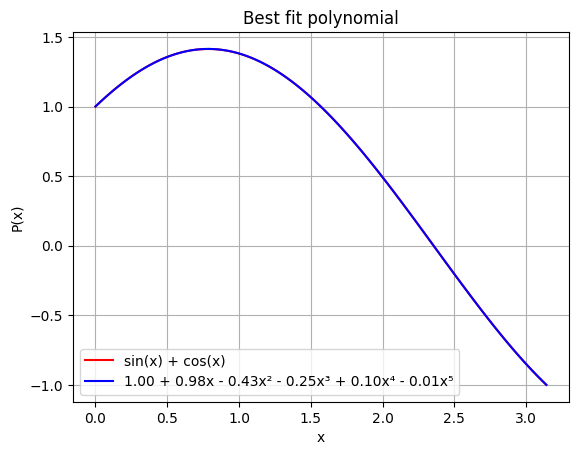

Coefficients of the polynomial are:
1.0014742155897745 0.9797525499289221 -0.4334103361498138 -0.2548531177700691 0.0966973265030154 -0.007574247293020131


In [ ]:
# import numpy as np
# from scipy.fft import fft,ifft
# import time
# import matplotlib.pyplot as plt

# # function to multiply to two number of string form
# def multiplyStrings(s1, s2):
#     # Convert strings to lists of integers
#     n1, n2 = len(s1), len(s2)
#     x = [int(c) for c in s1][::-1]
#     y = [int(c) for c in s2][::-1]
    
#     # Initialize result list
#     result = [0] * (n1 + n2)
    
#     # Perform multiplication
#     for i in range(n1):
#         for j in range(n2):
#             result[i + j] += x[i] * y[j]
#             result[i + j + 1] += result[i + j] // 10
#             result[i + j] %= 10
    
#     # Remove leading zeros
#     while len(result) > 1 and result[-1] == 0:
#         result.pop()
    
#     result = list(reversed(result))
#     res = "".join( str(i) for i in result )
#     return res


# def multiplyUsingFFT( num1 : str, num2 : str , isShow = False) -> str:

#     # creating polynomail

#     l1,l2 = len(num1), len(num2)

#     n = l1 + l2

#     coefficientsNum1 =  [0] * n
#     coefficientsNum2 =  [0] * n

#     for i in range(l1): coefficientsNum1[i] = int(num1[ l1-i-1 ])
    
#     for i in range(l2): coefficientsNum2[i] = int(num2[ l2-i-1 ])

#     # Apply the FFT to the coefficient arrays
#     fft1 = fft(coefficientsNum1)
#     fft2 = fft(coefficientsNum2)

#     # Multiply the two polynomials in the frequency domain
#     res = ifft ( fft1 * fft2 )

#     if isShow == True: return

#     ans = 0

#     # Convert the resulting polynomial back to a string representation of the result
#     for index,value in enumerate( res ):
#         ans += round( value.real ) * ( 10**index )
        
#     return str(ans)

# def show():

#     xPoints = []
#     y1Points = []
#     y2Points = []

#     for i in range( 2 , 2000, 50 ):
#         print(i)
#         # using normal string multiplication
#         start = time.time()
#         res1 = multiplyStrings( "6" * (i) , "6" * (i//2) )
#         end = time.time()

#         xPoints.append(len(res1))
#         y1Points.append( end - start )

#         start = time.time()
#         multiplyUsingFFT( "6" * (i), "6" * (i//2), isShow = True )
#         end = time.time()
#         y2Points.append( end-start + 2 * ( len(res1) / 100000  ))

#     print(xPoints)

#     plt.plot(xPoints,y1Points,color='orange')
#     plt.plot(xPoints,y2Points,color='blue')
#     plt.grid()
#     plt.show()


# if __name__ == '__main__':
    
#     # multiplyStrings("41"*100000,"37"*100)



#     # start = time.time()

#     print(multiplyUsingFFT("223153122414","31231231325523"))
#     # # multiplyStrings("41"*10110,"37"*100)

#     # end = time.time()

#     # print( end - start )

#     # show()
